In [1]:
%matplotlib inline

**Example code 24: Obtain a Quine code to reproduce the pCMV-Target-AID**  
We simulated the construction process of pCMV-Target-AID plasmid, which was constructed by assembling two fragments encoding the N- and C-terminus halves of Target-AID. They were both amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129 and HM128/RS046, respectively, with a backbone fragment amplified from pCMV-ABE7.10 using RS047/RS048. Firtst , the construction process was simulated using QUEEN module, and the GenBank output was generated. Then, the GenBank output was loaded as input, and the quine code to reproduce the GenBank file itself was generated by quine function.

In [2]:
import sys 
sys.path.append("../../")
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

In [3]:
#Load the backbone plasimids from GenBank inputs
QUEEN(record="https://benchling.com/s/seq-cfnGDU0Mq8cUwn185LPF", dbtype="benchling", product="pcDNA31_Target_AID") 
QUEEN(record="https://benchling.com/s/seq-K4HkSd2E8WiTAulJUeBf", dbtype="benchling", product="pCMV_ABE")

<queen.QUEEN object; project='pCMV_ABE', length='8727 bp', topology='circular'>

In [4]:
#Simulate the PCR process to amlify N-terminus of Target-AID
description1 = "The N-terminus of Target-AID (fragment1) was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT)\
 (Addgene 79620) using primer pairs RS045/HM129."
QUEEN(seq="GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG", product="RS045", pn="PCR", pd=description1)
QUEEN(seq="CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA", product="HM129", pn="PCR", pd=description1)
pcDNA31_Target_AID.searchsequence(RS045.seq[-18:], product="FW1", pn="PCR", pd=description1) #Search FW primer binding region
pcDNA31_Target_AID.searchsequence(HM129.seq[-18:], product="RV1", pn="PCR", pd=description1) #Search RV primer binding region
cropdna(pcDNA31_Target_AID, FW1[0].end, RV1[0].start, product="extract1", pn="PCR", pd=description1)
modifyends(extract1, RS045.seq, HM129.rcseq, product="fragment1", pn="PCR", pd=description1) #Simulate PCR

<queen.QUEEN object; project='fragment1', length='2596 bp', topology='linear'>

In [5]:
#Simulate the PCR process to amlify C-terminus of Target-AID
description2 = "The C-terminus of Target-AID (fragment2) was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT)\
 (Addgene 79620) using primer pairs HM128/RS046."
QUEEN(seq="CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC", product="HM128", pn="PCR", pd=description2)
QUEEN(seq="TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC", product="RS046", pn="PCR", pd=description2)
pcDNA31_Target_AID.searchsequence(HM128.seq[-18:], product="FW2", pn="PCR", pd=description2)
pcDNA31_Target_AID.searchsequence(RS046.seq[-18:], product="RV2", pn="PCR", pd=description2)
cropdna(pcDNA31_Target_AID, FW2[0].end, RV2[0].start, product="extract2", pn="PCR", pd=description2)
modifyends(extract2, HM128.seq, RS046.rcseq, product="fragment2", pn="PCR", pd=description2)

<queen.QUEEN object; project='fragment2', length='2831 bp', topology='linear'>

In [6]:
#Simulate the PCR process to amplify a backbone fragment
description3 = "The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS048."
QUEEN(seq="ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC", product="RS047", pn="PCR", pd=description3) 
QUEEN(seq="CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG", product="RS048", pn="PCR", pd=description3)
pCMV_ABE.searchsequence(RS047.seq[-18:], product="FW3", pn="PCR", pd=description3)
pCMV_ABE.searchsequence(RS048.seq[-18:], product="RV3", pn="PCR", pd=description3)
cropdna(pCMV_ABE, FW3[0].end, RV3[0].start, product="extract3", pn="PCR", pd=description3)
modifyends(extract3, RS047.seq, RS048.rcseq, product="fragment3", pn="PCR", pd=description3)

<queen.QUEEN object; project='fragment3', length='3403 bp', topology='linear'>

In [7]:
#Gibson Assembly
description4 = "The Target-AID plasmid (pCMV-Target-AID) was constructed\
 by assembling two insert fragments and a backbone fragments."
modifyends(fragment1, "*{25}/-{25}","-{28}/*{28}", product="fragment1_mod", pn="Gibson Assembly", pd=description4)
modifyends(fragment2, "*{28}/-{28}","-{25}/*{25}", product="fragment2_mod", pn="Gibson Assembly", pd=description4)
modifyends(fragment3, "*{25}/-{25}","-{25}/*{25}", product="fragment3_mod", pn="Gibson Assembly", pd=description4) 
joindna(fragment1_mod, fragment2_mod, fragment3_mod, topology="circular", product="pCMV_Target_AID", pn="Gibson Assembly", pd=description4)

<queen.QUEEN object; project='pCMV_Target_AID', length='8752 bp', topology='circular'>

In [8]:
pCMV_Target_AID.outputgbk("output/pCMV-Target-AID.gbk")
pCMV_Target_AID.printfeature()

feature_id  feature_type  qualifier:label     start  end   strand  
1           source        source              0      3308  +       
100         primer_bind   M13 Reverse         275    292   -       
200         primer_bind   M13/pUC Reverse     288    311   -       
300         protein_bind  lac operator        299    316   +       
400         promoter      lac promoter        323    354   -       
500         protein_bind  CAP binding site    368    390   +       
600         primer_bind   L4440               506    524   -       
700         rep_origin    ori                 677    1266  -       
800         primer_bind   pBR322ori-F         757    777   -       
900         CDS           AmpR                1436   2297  -       
1000        primer_bind   Amp-R               2059   2079  +       
1100        promoter      AmpR promoter       2297   2402  -       
1200        primer_bind   pRS-marker          2480   2500  -       
1300        enhancer      CMV enhancer        26

In [9]:
pCMV_Target_AID_rep = QUEEN(record="output/pCMV-Target-AID.gbk")
quine(pCMV_Target_AID_rep, project="pCMV_Target_AID", output="output/pCMV-Target-AID_reconstruction.py")

In [10]:
#!pwd
#!cat output/pCMV-Target-AID_reconstruction.py 
#!/usr/local/bin/python3 output/pCMV-Target-AID_reconstruction.py 
!/usr/local/bin/python3 output/pCMV-Target-AID_reconstruction.py > output/reconstructed_pCMV-Target-AID.gbk
!diff -s output/pCMV-Target-AID.gbk output/reconstructed_pCMV-Target-AID.gbk

Files output/pCMV-Target-AID.gbk and output/reconstructed_pCMV-Target-AID.gbk are identical


In [11]:
!/usr/local/bin/python3 output/pCMV-Target-AID_reconstruction_modified.py

################################################################################
#This source code was auto-generated by 'quine' funtion of QUEEN 1.0.0.
#Project Name    :pCMV_Target_AID_modified
#File Name       :None
#Creation Date   :2021-10-21
################################################################################
project='pCMV_Target_AID'
import sys
sys.path.append("/usr/local/lib/python3.9/site-packages/QUEEN-1.0.0-py3.9.egg")
from QUEEN.queen import *
from QUEEN import cutsite as cs
set_namespace(globals())

QUEEN(record='https://benchling.com/s/seq-cfnGDU0Mq8cUwn185LPF', dbtype='benchling', project='pcDNA31_Target_AID', product='pcDNA31_Target_AID', process_id='pCMV_Target_AID-5G38TDZ6NFZK9WJTE8CWAK4UH:5IXQQCEOXDA6ONGH42DZWERP0:1', original_ids=[])
QUEEN(record='https://benchling.com/s/seq-OCkN5m6U6st0I9ToyOn1', dbtype='benchling', project='pCMV_ABE', product='pCMV_ABE', process_id='pCMV_Target_AID_modified-9RDEKOVCMUDJV7S8TXSI524K1:E5KWY5EXESSLFU2OO0KMHSC5J:2', origin

In [12]:
pCMV_Target_AID.printfeature()
description5 = "Extract a fragment spanning from 8,000 nt to 2,000 nt of pCMV-Target-AID"
cropdna(pCMV_Target_AID, 8000, 2000, product="fragment", process_description=description5)
quine(fragment)

feature_id  feature_type  qualifier:label     start  end   strand  
1           source        source              0      3308  +       
100         primer_bind   M13 Reverse         275    292   -       
200         primer_bind   M13/pUC Reverse     288    311   -       
300         protein_bind  lac operator        299    316   +       
400         promoter      lac promoter        323    354   -       
500         protein_bind  CAP binding site    368    390   +       
600         primer_bind   L4440               506    524   -       
700         rep_origin    ori                 677    1266  -       
800         primer_bind   pBR322ori-F         757    777   -       
900         CDS           AmpR                1436   2297  -       
1000        primer_bind   Amp-R               2059   2079  +       
1100        promoter      AmpR promoter       2297   2402  -       
1200        primer_bind   pRS-marker          2480   2500  -       
1300        enhancer      CMV enhancer        26

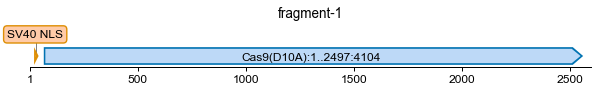

In [13]:
fig1=visualizedna(fragment1, title="fragment-1")
fig1.savefig("output/fig1.pdf", bbox_inches="tight")

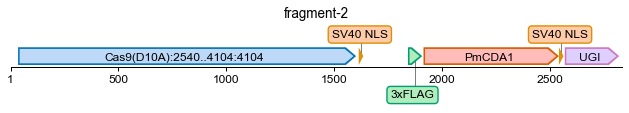

In [14]:
fig2=visualizedna(fragment2, title="fragment-2")
fig2.savefig("output/fig2.pdf", bbox_inches="tight")

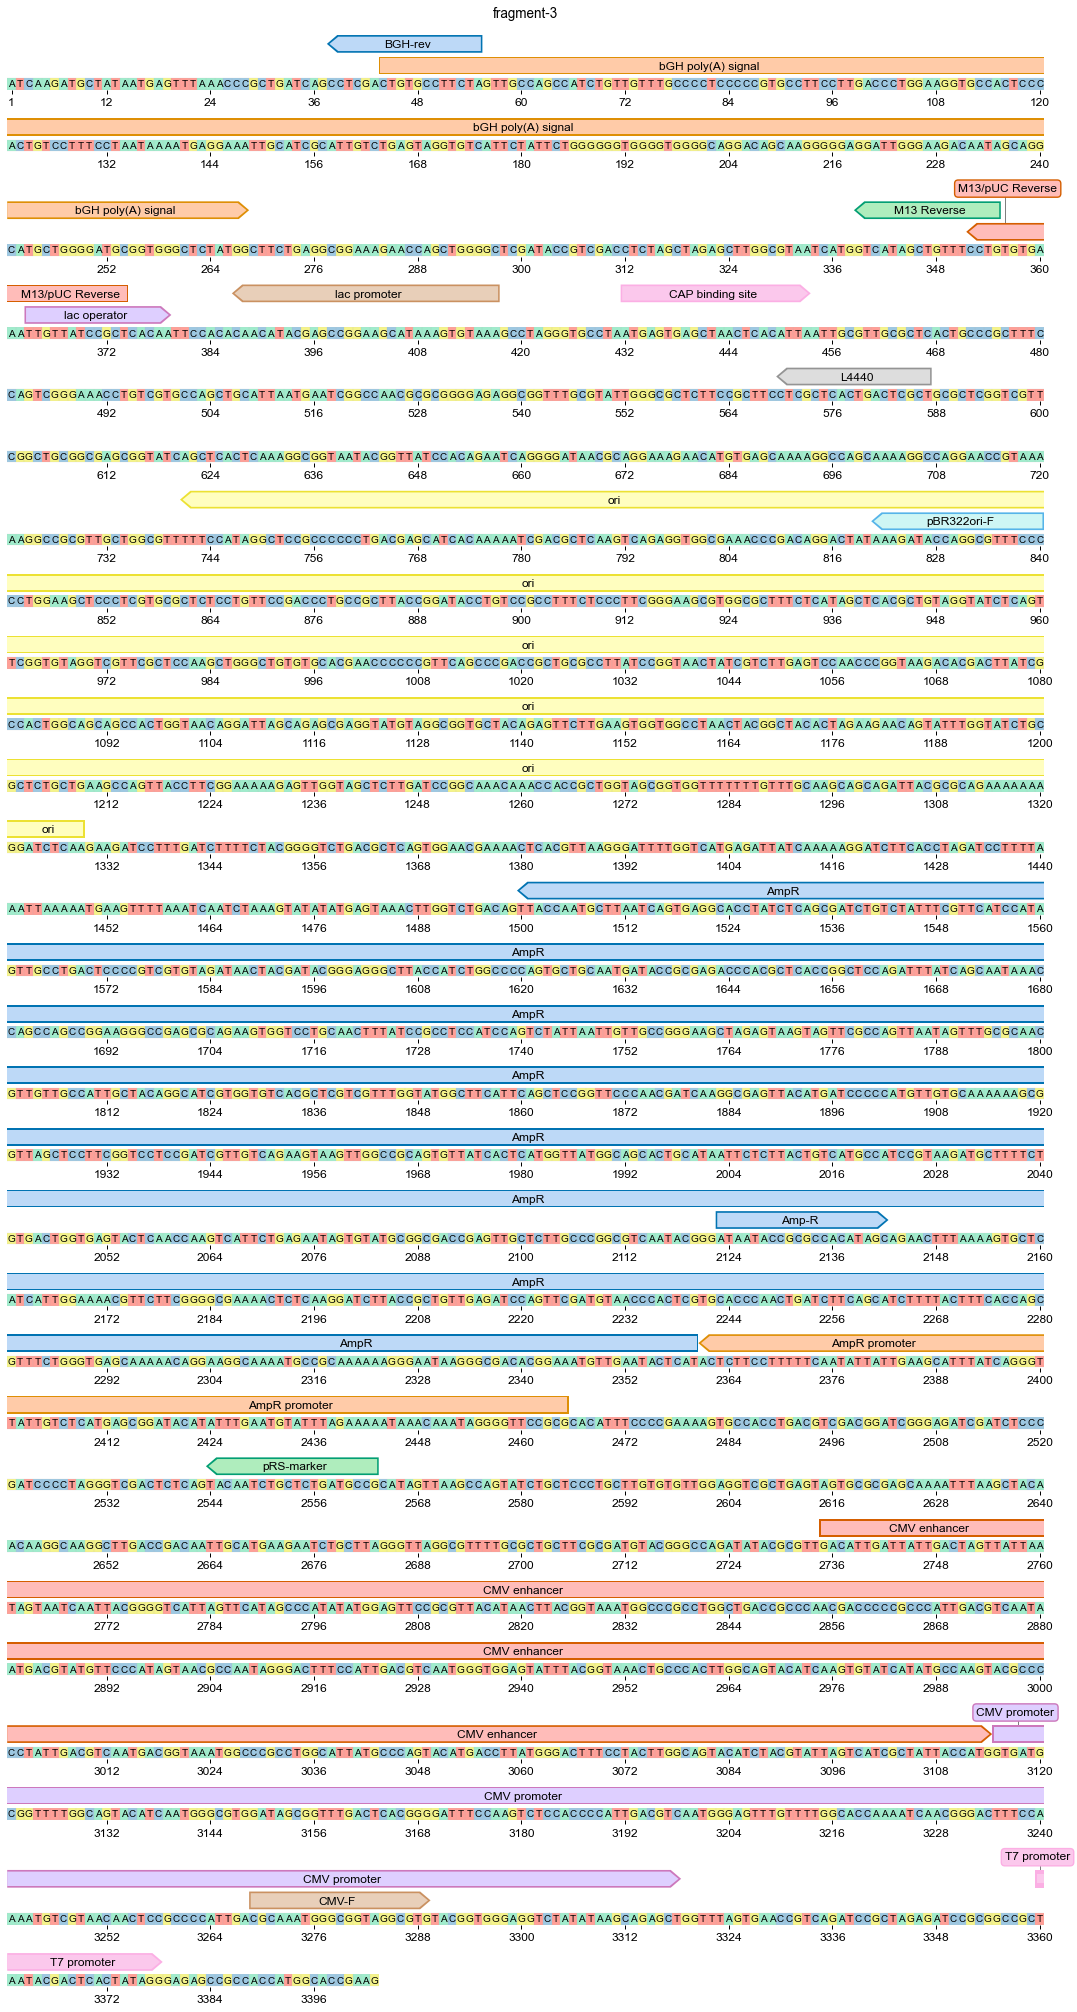

In [15]:
fig3 = visualizedna(fragment3, linebreak=120, seq=True, title="fragment-3")
fig3.savefig("output/fig3.pdf", bbox_inches="tight")

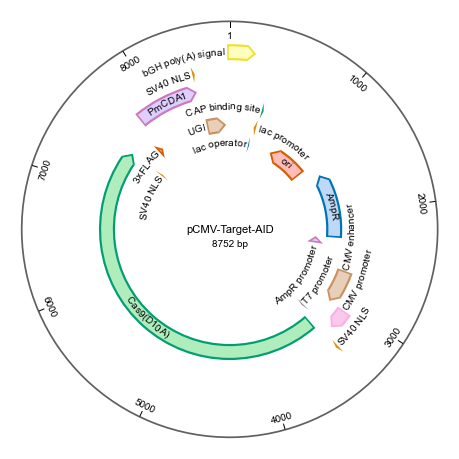

In [16]:
features = pCMV_Target_AID.searchfeature(key_attribute="feature_type", query="^(?!.*primer).*$")
fig4 = visualizedna(pCMV_Target_AID, feature_list=features, map_view="circular", tick_space=1000, title="pCMV-Target-AID")
fig4.savefig("output/fig4.pdf", bbox_inches="tight")

In [18]:
alias_dict = {"pcDNA31_Target_AID": "pcDNA31-Target-AID",
              "pCMV_ABE": "pCMV-ABE",
              "pCMV_Target_AID": "pCMV-Target-AID",
              "extract1": "extract-1",
              "extract1": "extract-1",
              "extract1": "extract-1",
              "extract1": "extract-1",
              "extract2": "extract-2",
              "extract3": "extract-3",
              "fragment1": "fragment-1",
              "fragment2": "fragment-2",
              "fragment3": "fragment-3",
              "fragment1_mod": "fragment-1_mod",
              "fragment2_mod": "fragment-2_mod",
              "fragment3_mod": "fragment-3_mod"}
graph1 = visualizeflow(pCMV_Target_AID, sf=False, ip=True, pc=False, alias_dict=alias_dict)
graph2 = visualizeflow(pCMV_Target_AID, sf=True,  ip=True, pc=False, alias_dict=alias_dict)
graph3 = visualizeflow(pCMV_Target_AID, sf=True,  ip=True,  pc=True, pd=True, alias_dict=alias_dict)
graph4 = visualizeflow(pCMV_Target_AID, sf=True,  ip=False, pc=True, pd=False, alias_dict=alias_dict)

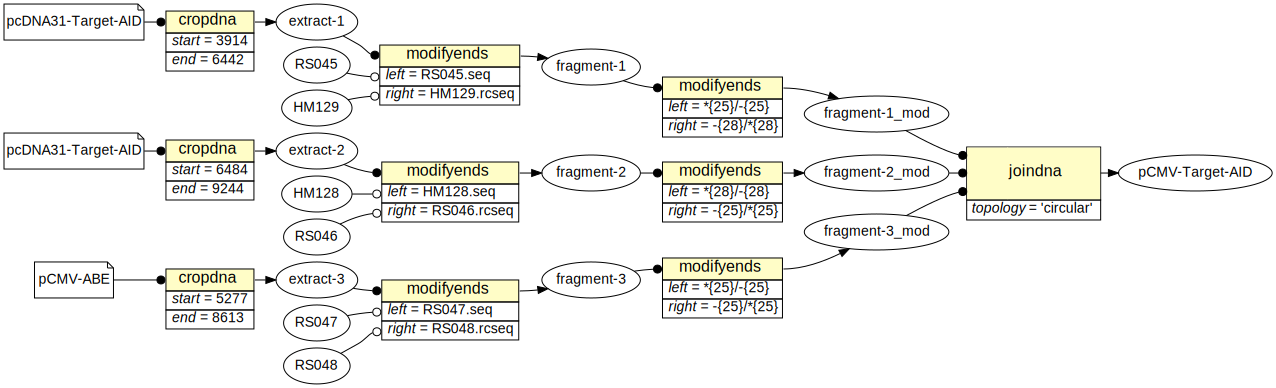

In [19]:
graph1

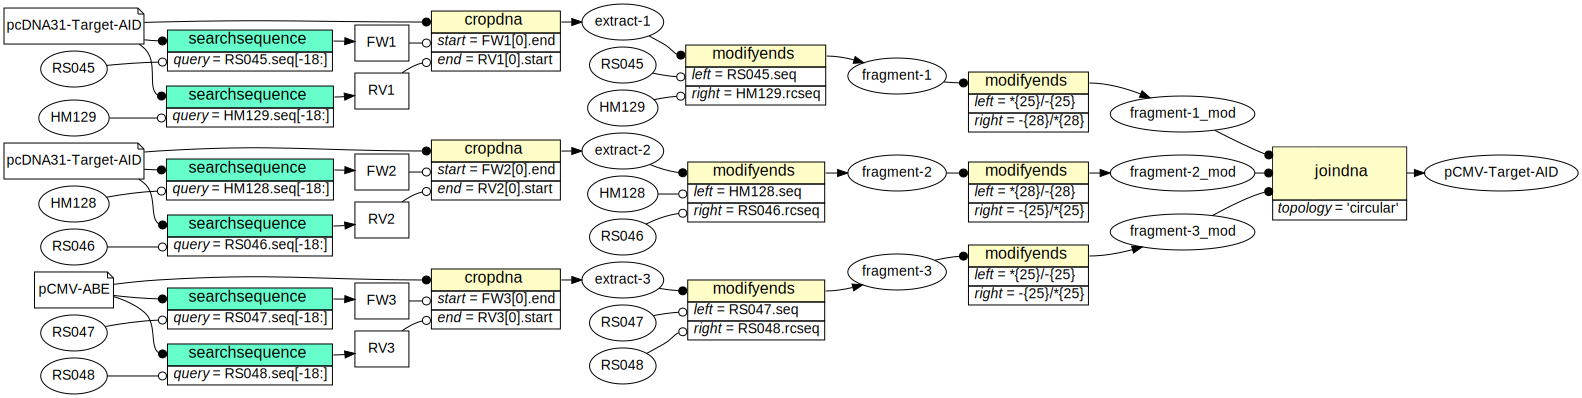

In [20]:
graph2

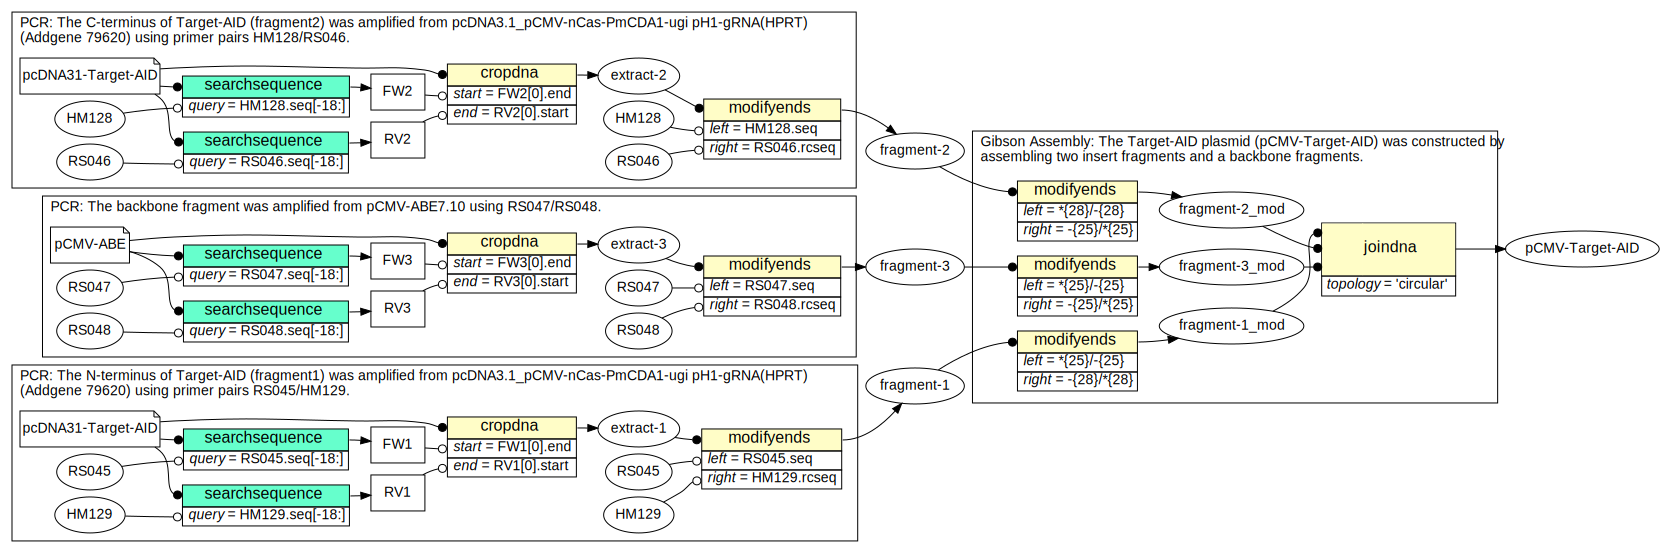

In [21]:
graph3

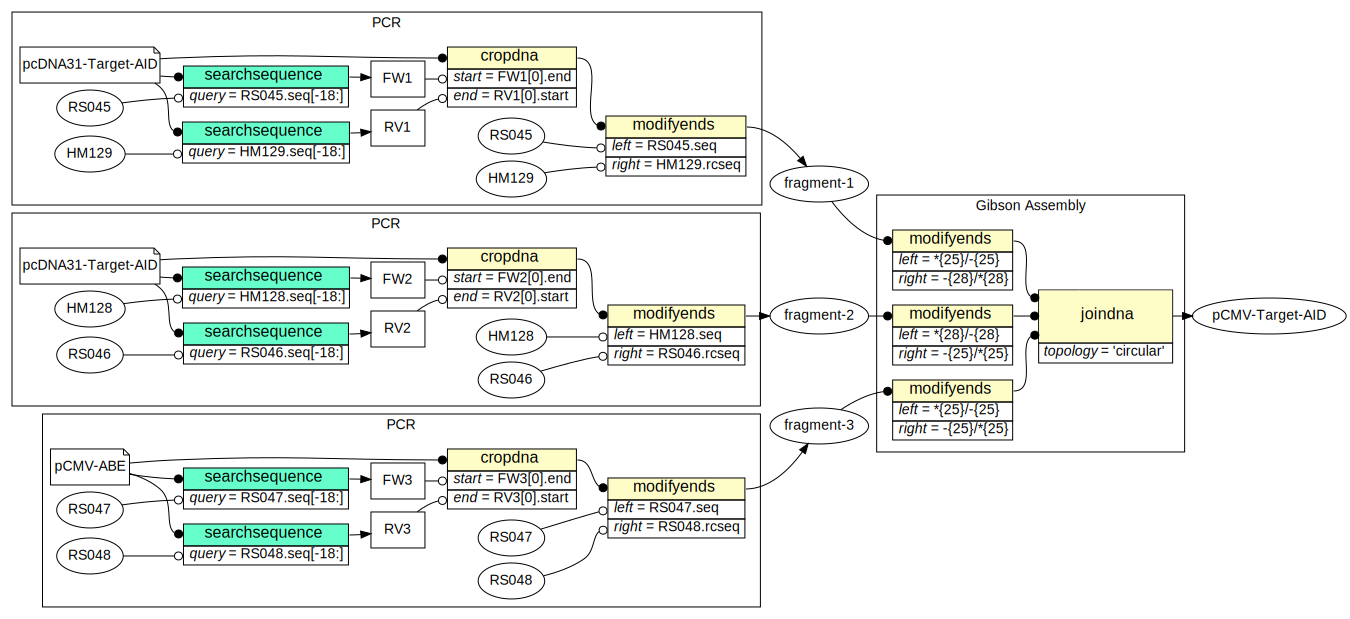

In [22]:
graph4

In [23]:
graph1.render("output/pCMV-Target-AID_flow1")
graph2.render("output/pCMV-Target-AID_flow2")
graph3.render("output/pCMV-Target-AID_flow3")
graph4.render("output/pCMV-Target-AID_flow4")

'output/pCMV-Target-AID_flow4.pdf'